In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv')
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


In [52]:
df.isnull().sum()

State                               0
Year                                0
Rape                                0
Kindnap and abduction               0
Dowary Deaths                       0
Assault aganist women               0
Assault against Modesty of Women    0
Domestic volience                   0
Women Trafficking                   0
Total Crimes                        0
dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.describe()

,Year,Rape,Kindnap and abduction,Dowary Deaths,Assault aganist women,Assault against Modesty of Women,Domestic volience,Women Trafficking,Total Crimes
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565,6613.752717
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660,9056.583832
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000,146.750000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000,2632.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000,10299.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000,52246.000000


In [38]:
df.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

In [39]:
df = df.rename(columns={
    'K&A': 'Kindnap and abduction',
    'DD': 'Dowary Deaths',
    'AoW' : 'Assault aganist women',
    'AoM':'Assault against Modesty of Women',
    'DV':'Domestic volience',
    'WT':'Women Trafficking'
})

In [40]:
df = df.drop('Unnamed: 0', axis=1)


In [41]:
df.columns

Index(['State', 'Year', 'Rape', 'Kindnap and abduction', 'Dowary Deaths',
       'Assault aganist women', 'Assault against Modesty of Women',
       'Domestic volience', 'Women Trafficking'],
      dtype='object')

**1. Which state has the highest number of total crimes against women?**

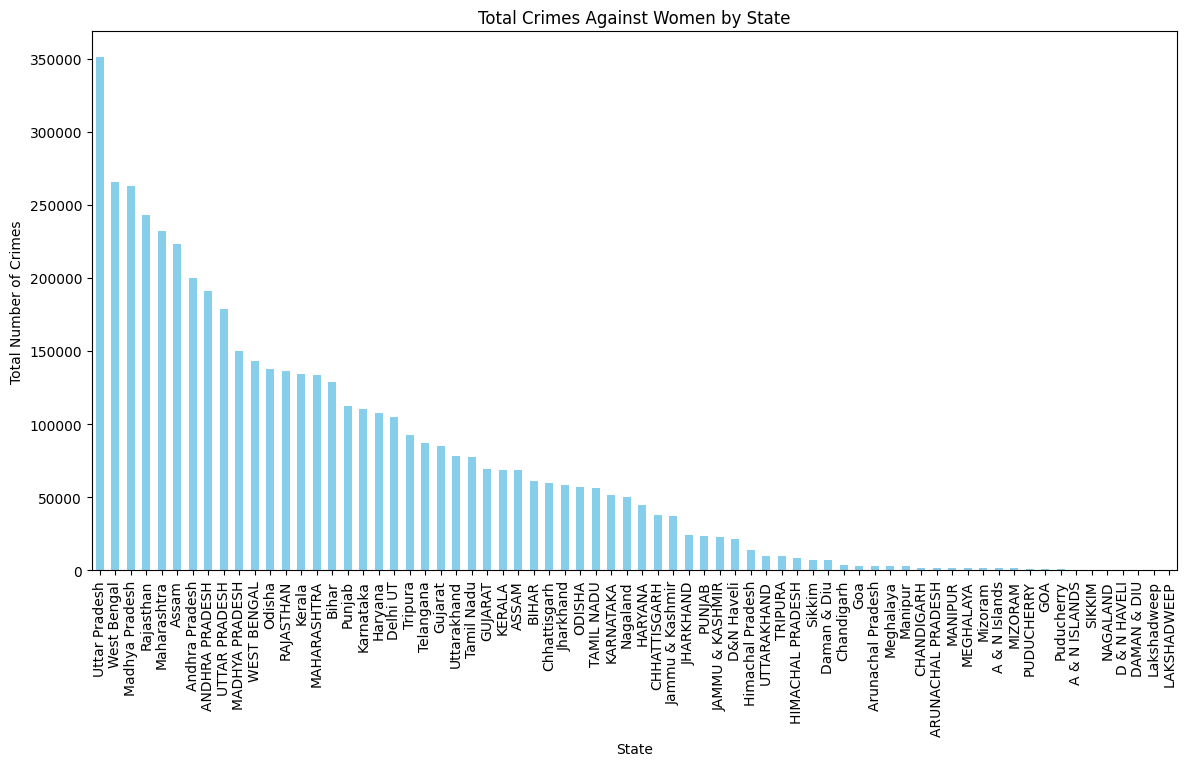

In [48]:
# Add a 'Total Crimes' column to the dataset

# Group by 'State' and sum the total crimes
state_crime_totals = df.groupby('State')['Total Crimes'].sum().sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(14, 7))
state_crime_totals.plot(kind='bar', color='skyblue')
plt.title('Total Crimes Against Women by State')
plt.xlabel('State')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.show()


**2. Over all Crime percentage aagainst women in India ?**

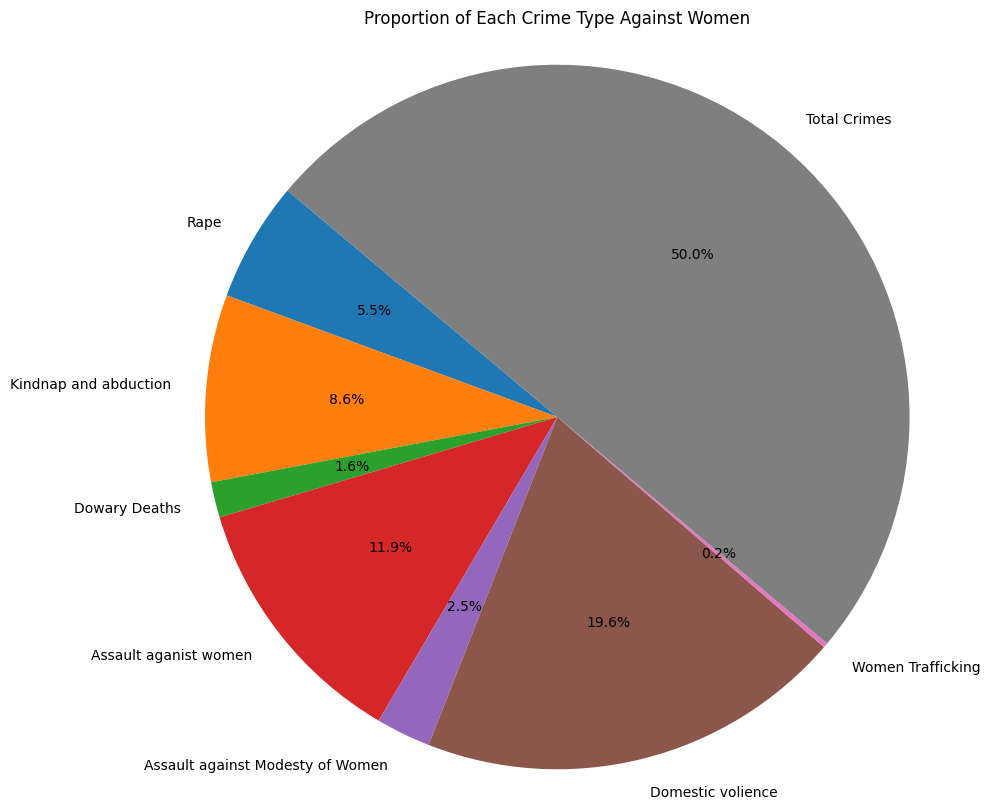

In [50]:
# Sum up each crime type
crime_sums = df.iloc[:, 2:].sum()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(crime_sums, labels=crime_sums.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Crime Type Against Women')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


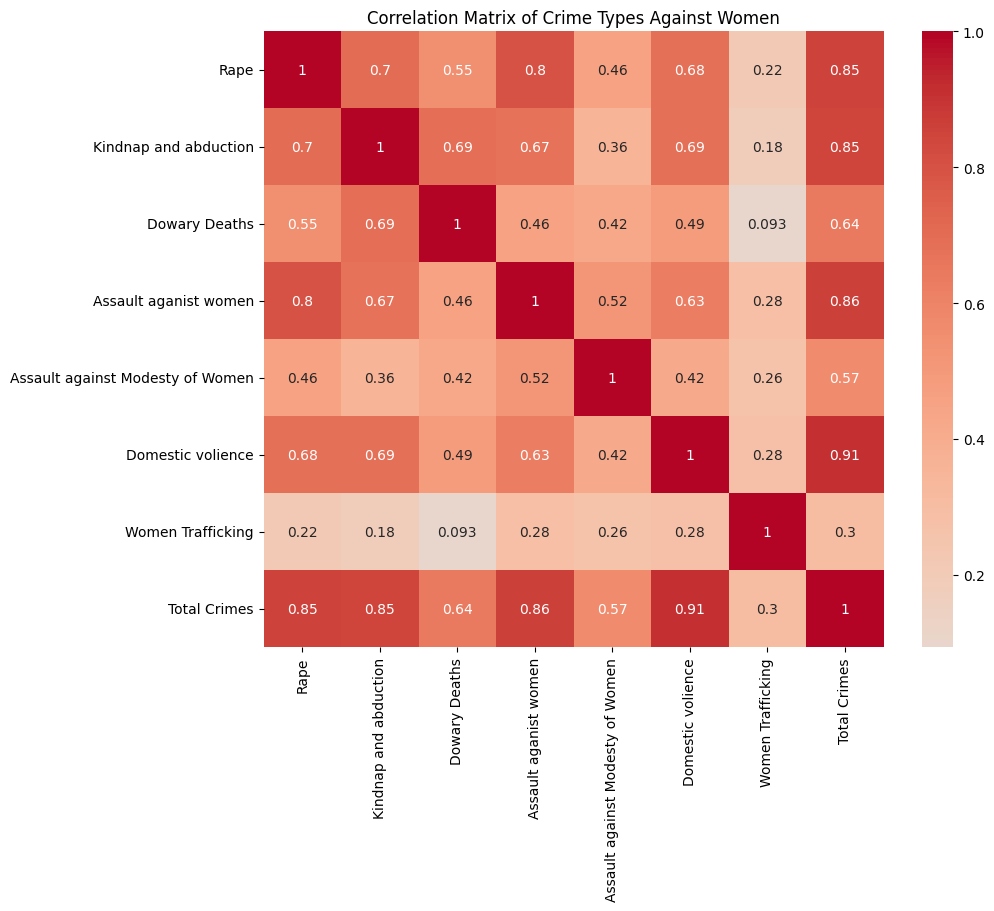

In [56]:
# Calculate the correlation matrix for crime types
crime_correlation = df.iloc[:, 2:].corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(crime_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Crime Types Against Women')
plt.show()


**3. What are the Top 3 states in india in every crime aspect?**

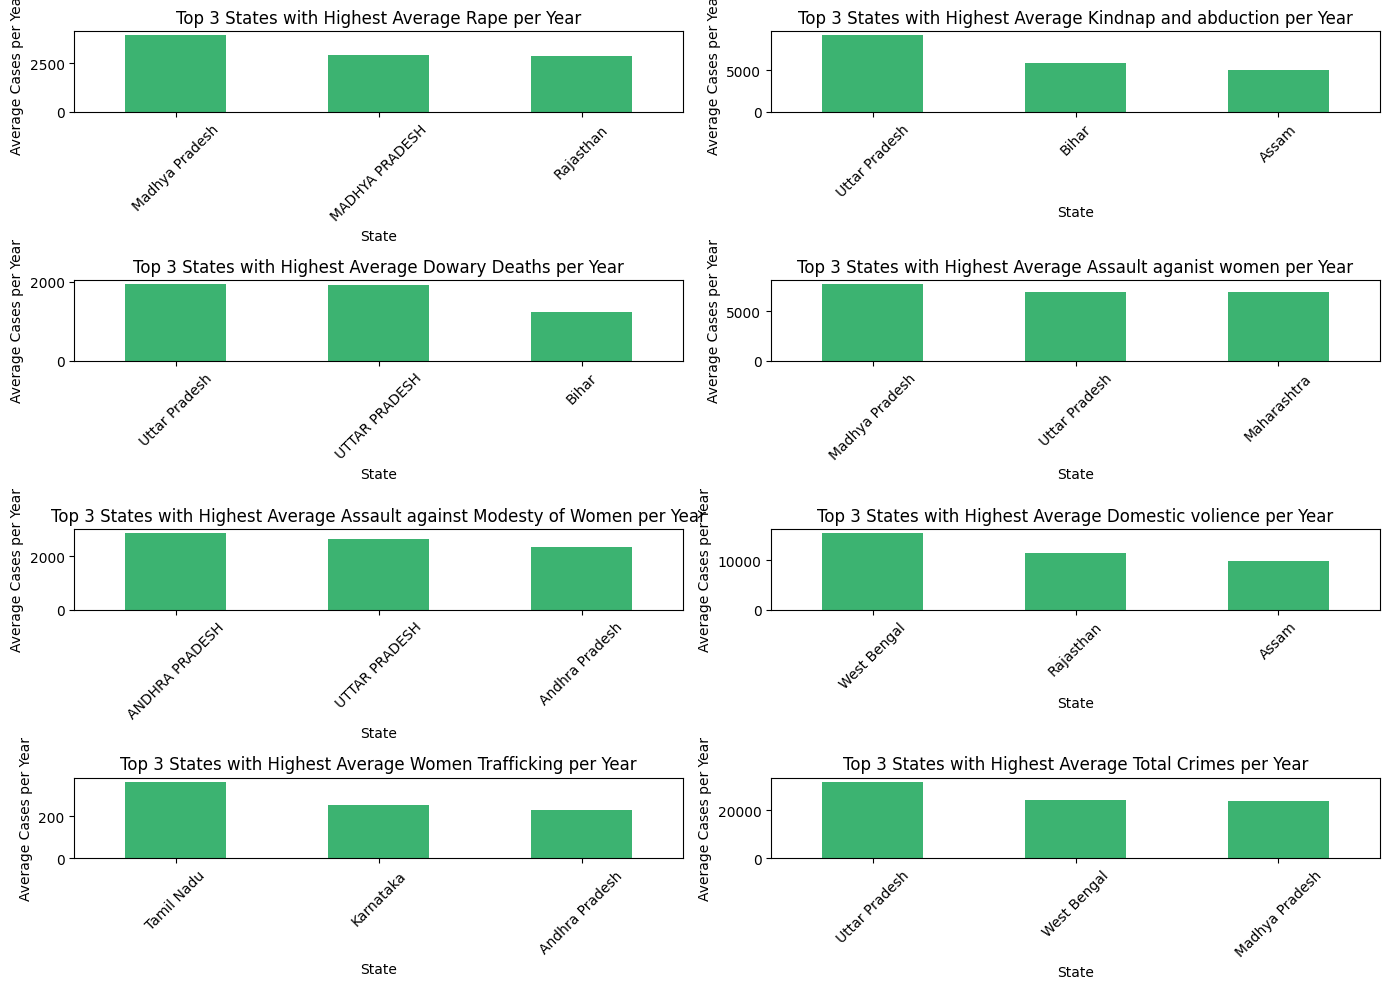

In [58]:
# Calculate the average number of each crime type per year for each state
avg_crimes = df.groupby('State').mean().drop(['Year'], axis=1)

# For each crime type, find the top 3 states
plt.figure(figsize=(14, 10))
for i, column in enumerate(avg_crimes.columns, 1):
    top_3_states = avg_crimes[column].nlargest(3)

    # Plot a bar chart for the top 3 states
    plt.subplot(4, 2, i)
    top_3_states.plot(kind='bar', color='mediumseagreen')
    plt.title(f'Top 3 States with Highest Average {column} per Year')
    plt.ylabel('Average Cases per Year')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**4. What are states with highest Rape cases from 2001-2021 in India?**

In [60]:
top_10_states_highest_rape = df.groupby('State')['Rape'].sum().nlargest(10)
print(top_10_states_highest_rape)

State
Madhya Pradesh    43552
Rajasthan         31850
Uttar Pradesh     30641
MADHYA PRADESH    29256
Maharashtra       24806
Assam             19428
Kerala            18888
Punjab            18762
WEST BENGAL       16378
Odisha            15950
Name: Rape, dtype: int64


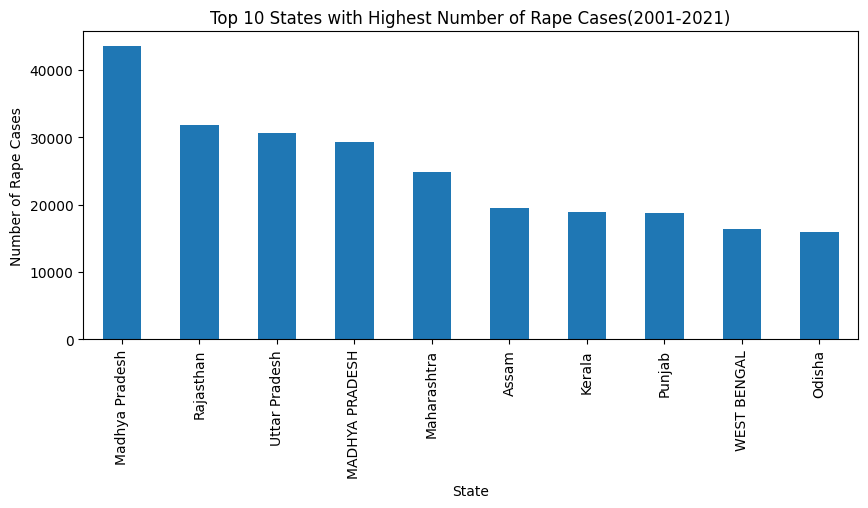

In [61]:
plt.figure(figsize=(10, 4))
top_10_states_highest_rape.plot(kind='bar')
plt.title('Top 10 States with Highest Number of Rape Cases(2001-2021)')
plt.xlabel('State')
plt.ylabel('Number of Rape Cases')
plt.show()


**5. What is the graph of rape cases based on Year from 2001 - 2021?**

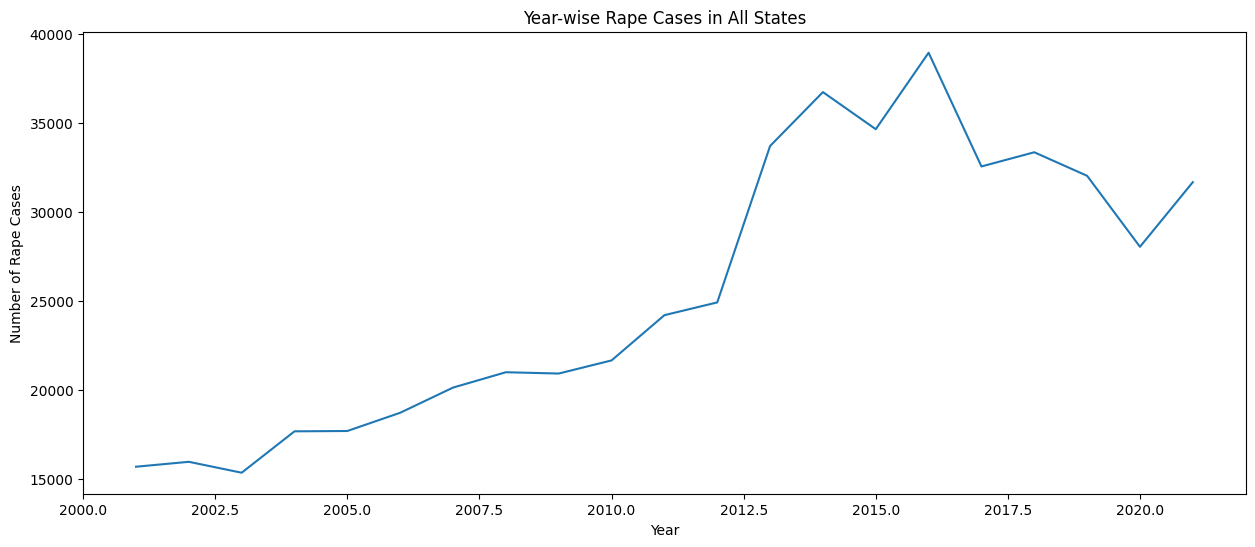

In [62]:
yearly_rape_cases = df.groupby('Year')['Rape'].sum()

plt.figure(figsize=(15, 6))
plt.plot(yearly_rape_cases.index, yearly_rape_cases.values)
plt.title('Year-wise Rape Cases in All States')
plt.xlabel('Year')
plt.ylabel('Number of Rape Cases')
plt.show()

**6. What is the graph of women trafficking cases based on Year from 2001 - 2021?**


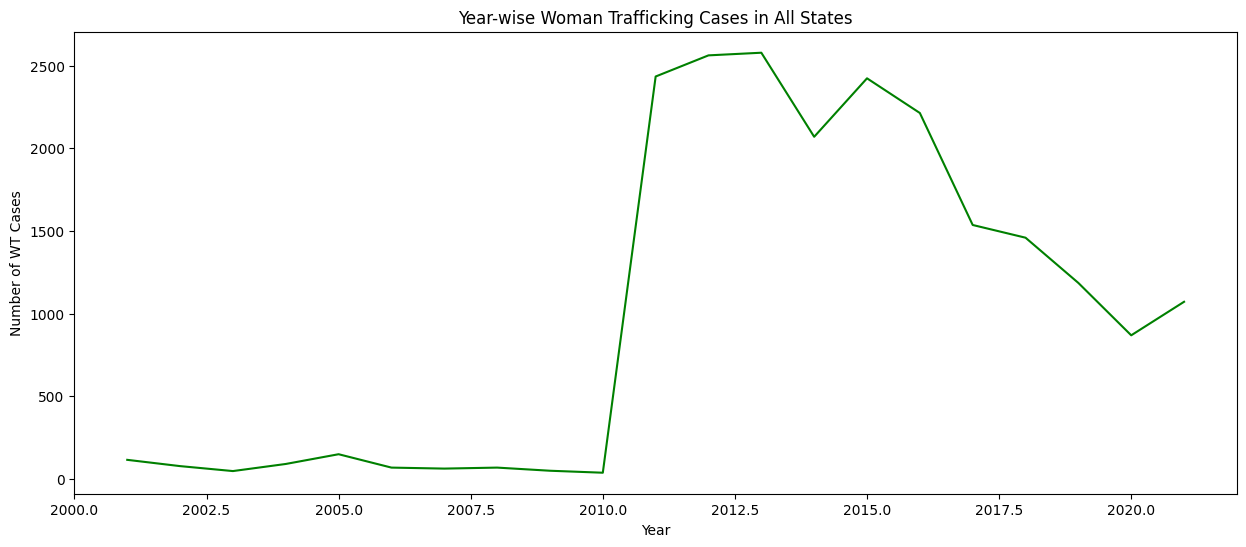

In [72]:
yearly_WT_cases = df.groupby('Year')['Women Trafficking'].sum()

plt.figure(figsize=(15, 6))
plt.plot(yearly_WT_cases.index, yearly_WT_cases.values,color='green')
plt.title('Year-wise Woman Trafficking Cases in All States')
plt.xlabel('Year')
plt.ylabel('Number of WT Cases')
plt.show()

**7. States with Highest Number of Domestic Violence (2001-2021)**

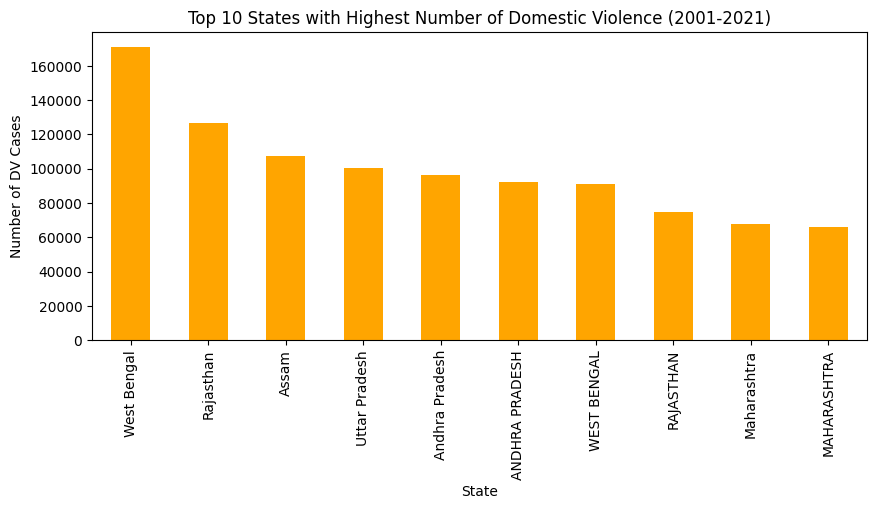

In [76]:
top_10_states_highest_DV = df.groupby('State')['Domestic volience'].sum().nlargest(10)
plt.figure(figsize=(10, 4))
top_10_states_highest_DV.plot(kind='bar',color='orange')
plt.title('Top 10 States with Highest Number of Domestic Violence (2001-2021)')
plt.xlabel('State')
plt.ylabel('Number of DV Cases')
plt.show()

**Conclusion**

The analysis reveals a concerning trend of increasing crimes against women across several states, with specific crimes like domestic violence and assault showing high prevalence. Certain states report consistently higher crime rates, indicating the need for targeted interventions. There are notable correlations between different crime types, such as 'Rape' and 'Kidnap and abduction,' suggesting common underlying factors. While some states have seen a reduction in specific crimes, others continue to struggle with rising cases, especially in dowry deaths and trafficking. Overall, the data underscores the urgent need for state-specific policies, enhanced law enforcement, public awareness, and robust support systems to address this complex issue effectively.






